In [24]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [25]:
# load results
#results = pickle.load( open( "results_exp_mnist_low_sample.p", "rb" ) )
# if the file is saved from python 2
results = pickle.load(open("results_exp_mnist_kstest.p", "rb"), encoding='latin1')
deltalist = results[0]
powerlist = results[1]
powerlist_oracle = results[2]

cdflist = results[3]
cdflist_oracle = results[4]

#powerlist_x = results[5]
#cdflist_x = results[6]

powerlistT = np.array(powerlist).T

print(powerlistT)

print(powerlist_x)

[[ 0.032  0.138  0.098  0.168  0.344  0.268  0.38   0.38   0.616  0.57 ]
 [ 0.05   0.118  0.104  0.268  0.312  0.364  0.538  0.736  0.836  0.898]
 [ 0.036  0.096  0.1    0.204  0.296  0.382  0.644  0.716  0.86   0.928]
 [ 0.03   0.146  0.076  0.186  0.358  0.362  0.638  0.756  0.87   0.94 ]
 [ 0.028  0.124  0.104  0.188  0.308  0.392  0.628  0.74   0.918  0.968]]
[0.82000000000000006, 1.0]


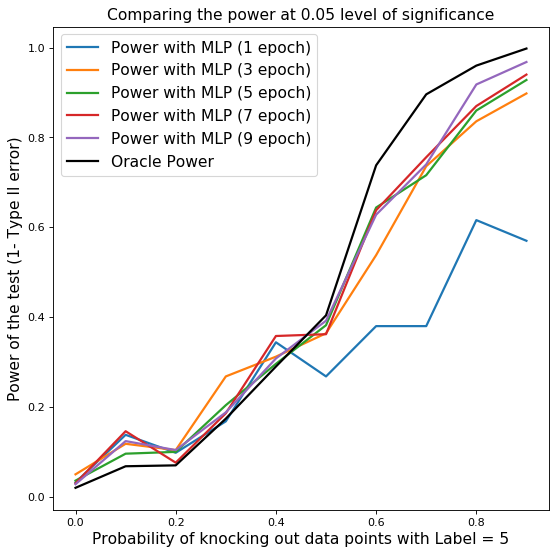

In [26]:
#plot figures
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

num_epoch = 1
legendslist=[]
# plot the comparison
for item in powerlistT:
    plt.plot(deltalist,item,linewidth=2)
    legendslist.append('Power with MLP ('+repr(num_epoch)+' epoch)')
    num_epoch += 2
    
plt.plot(deltalist,powerlist_oracle,linewidth=2,color='k')

#plt.plot(deltalist,powerlist_x,linewidth=2,color='k')

legendslist.append('Oracle Power')
#legendslist.append('Power with tests on P(x)')
plt.xlabel('Probability of knocking out data points with Label = 5', fontsize=14)
plt.ylabel('Power of the test (1- Type II error)',fontsize=14)
plt.legend(legendslist, loc='best',fontsize=14)

plt.title('Comparing the power at 0.05 level of significance',fontsize=14)

plt.show()

#fig.savefig("Hypothesis-Testing-power-as-we-train-more.pdf", bbox_inches='tight')

In [27]:
# plot the QQ-plot for different levels

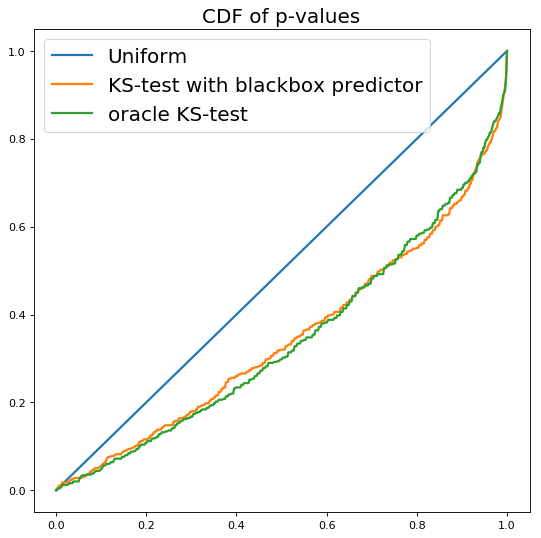

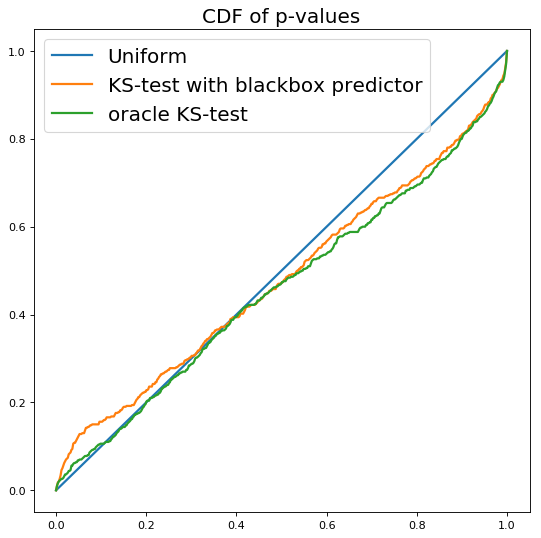

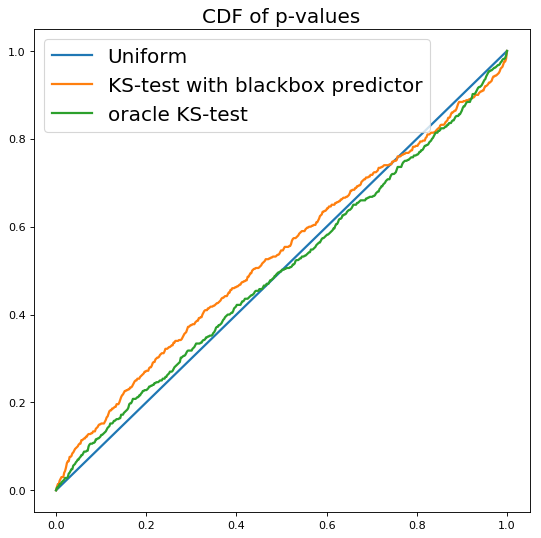

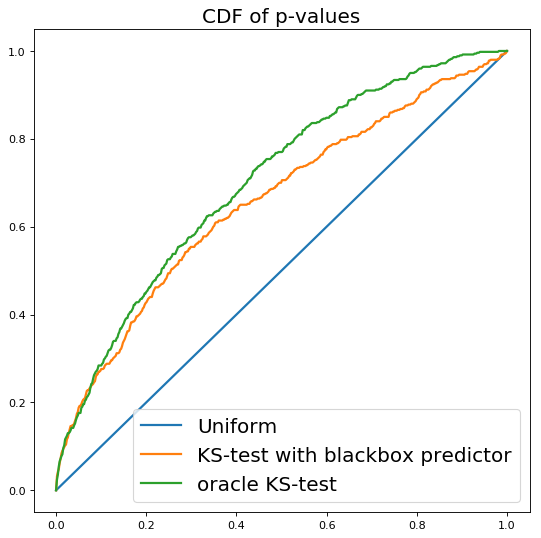

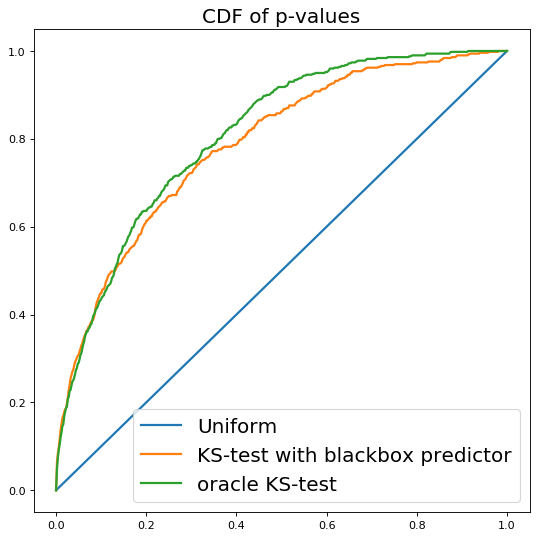

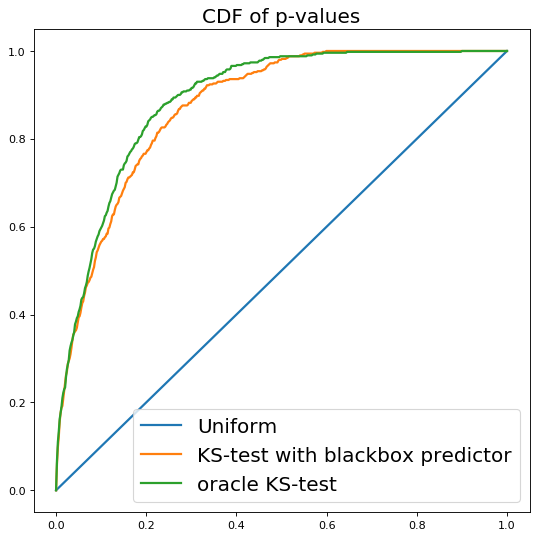

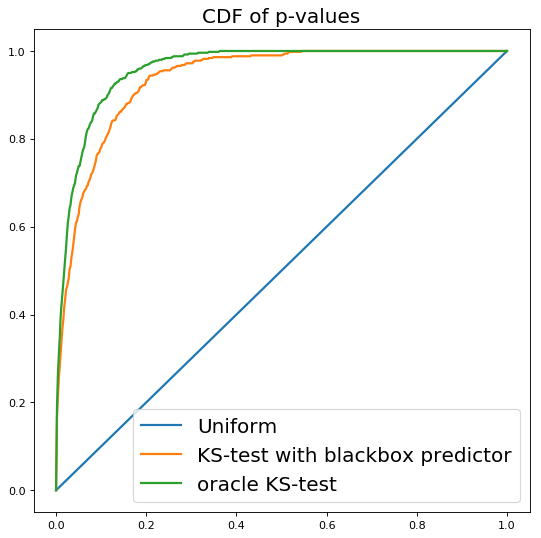

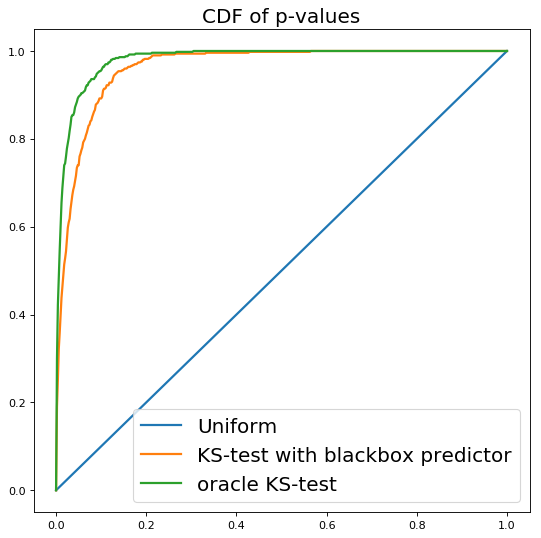

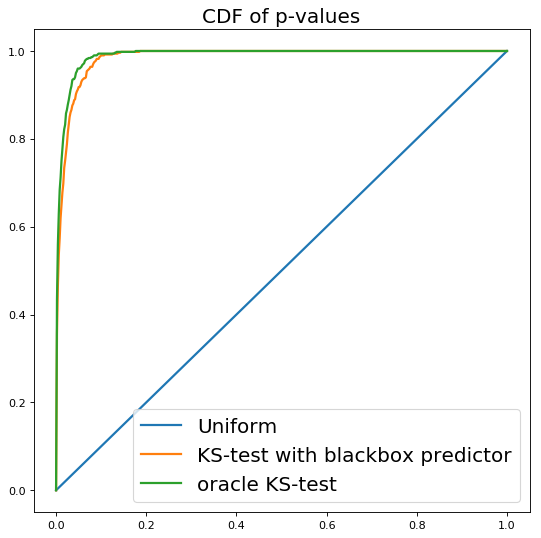

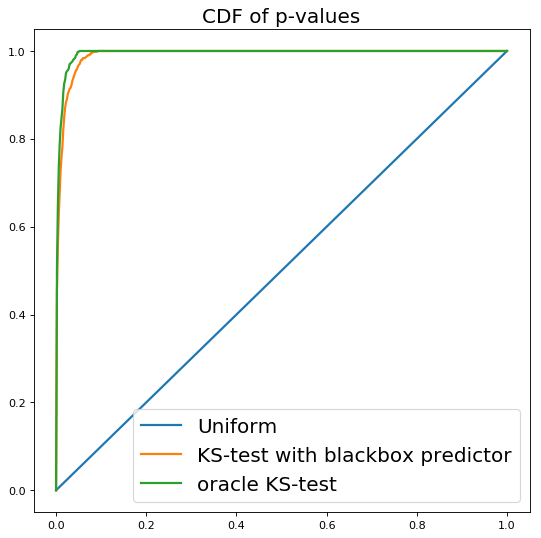

In [31]:
for (delta,item1,item2) in zip(deltalist,cdflist,cdflist_oracle):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    
    delta = int(delta*10)
    xx=  np.linspace(0, 1, num=500)

    cdfpval = item1
    cdfpval_gnd = item2
    plt.plot(xx, xx,linewidth=2)
    plt.plot(xx, cdfpval(xx),linewidth=2)
    plt.plot(xx, cdfpval_gnd(xx),linewidth=2)

    plt.legend(['Uniform', 'KS-test with blackbox predictor', 'oracle KS-test'], loc='best',fontsize=18)
    plt.title('CDF of p-values', fontsize=18)
    #fig.savefig("Hypothesis-Testing"+"delta-0"+repr(delta)+".pdf", bbox_inches='tight')